In [1]:
# Importing MNIST dataset from keras
from keras.datasets import mnist

In [2]:
# Loading dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

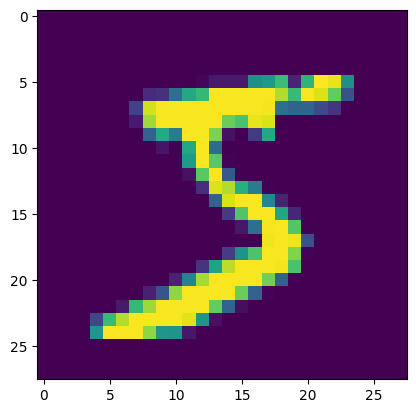

In [9]:
plt.imshow(X_train[0])

In [8]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
# Normalizing

X_train = X_train/255     # Max value is 255

In [11]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# creating CNN

from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [13]:
model = Sequential()

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
model.compile(optimizer = 'Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.1, batch_size = 50)

Epoch 1/10
1080/1080 [==============================] - 88s 80ms/step - loss: 0.1458 - accuracy: 0.9548 - val_loss: 0.0480 - val_accuracy: 0.9855
Epoch 2/10
1080/1080 [==============================] - 77s 71ms/step - loss: 0.0441 - accuracy: 0.9869 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 3/10
1080/1080 [==============================] - 80s 74ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 4/10
1080/1080 [==============================] - 76s 71ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 5/10
1080/1080 [==============================] - 79s 74ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0414 - val_accuracy: 0.9905
Epoch 6/10
1080/1080 [==============================] - 79s 73ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 7/10
1080/1080 [==============================] - 79s 73ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0331 -

In [17]:
# Prediction

prediction = model.predict(x = X_test, batch_size = 50)

200/200 [==============================] - 4s 21ms/step


In [27]:
import numpy as np
pred = np.argmax(prediction, axis = -1)

In [30]:
# Model evaluation
from sklearn.metrics import accuracy_score

In [31]:
accuracy_test = accuracy_score(pred, y_test)

In [32]:
print(accuracy_test)

0.9837


In [1]:
import tensorflow as tf

# Save the model
model.save("mnist_model.h5")

print("Model saved as mnist_model.h5")


ModuleNotFoundError: No module named 'tensorflow'